# Clustering the Countries for HELP International

## Objective:

***To categorise the countries using socio-economic and health factors that determine the overall development of the country.***

## About organization:

***HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.***

## Problem Statement

***HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 250)

C:\Users\Omar\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("data/countries/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

## Explain The Features

In [4]:
exp = pd.read_csv("data/countries/data-dictionary.csv")
exp

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


## Describe The Data

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


* **The minimum of child death rate is 2.6 and the maximum is 208. The average is 38.27**
* **The inflation has negative values which means bad economic stability**
* **The average number of children per each woman is approximately 3.0 children**
* **The highest GDPP is 105000, and the lowest is 231 and the average is 12964**

In [6]:
df[df["gdpp"]==231]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.6,39.2,764,12.3,57.7,6.26,231


***The country with the lowest gdpp is Burundi (An african country)***

In [7]:
df[df["gdpp"]==105000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000


***The country with the lowest gdpp is Luxembourg (An European country)***

In [8]:
df[(df["gdpp"]<13000) & (df["gdpp"]>12500)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
33,Chile,8.7,37.7,7.96,31.3,19400,8.96,79.1,1.88,12900
121,Poland,6.0,40.1,7.46,42.1,21800,1.66,76.3,1.41,12600


***The countries with the average gdpp are countries like Chile and Poland***

In [9]:
df[(df["inflation"]>=0) & (df["inflation"]<=3)].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400


***Central banks and economists often target a specific inflation rate to maintain price stability while promoting economic growth. While opinions on what constitutes a "good" inflation rate can vary, many central banks aim for an inflation target around 2% annually***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Columns Renaming

In [12]:
df = df.rename(columns={"total_fer":"children_per_woman"})
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# First, Financial aid (What countries deserve financial aid the most ?)

In [13]:
X = df[["child_mort", "life_expec", "income", "gdpp"]]
X.head()

,child_mort,life_expec,income,gdpp
0,90.2,56.2,1610,553
1,16.6,76.3,9930,4090
2,27.3,76.5,12900,4460
3,119.0,60.1,5900,3530
4,10.3,76.8,19100,12200


## Data Visualization - Features Understanding

In [14]:
def draw_hist():
    fig = plt.figure(figsize=(10,6))
    for i in range(len(X.columns)):
        plt.subplot(2,2,i+1)
        sns.histplot(X[X.columns[i]], bins='auto')
        plt.tight_layout()
    plt.show()
    
def draw_box():
    fig = plt.figure(figsize=(10,6))
    for i in range(len(X.columns)):
        plt.subplot(2,2,i+1)
        sns.boxplot(X[X.columns[i]])
        plt.tight_layout()
    plt.show()
    
def remove_outliers():
    for i in X.columns:
        Q3 = np.percentile(X[i], 75)
        Q1= np.percentile(X[i], 25)
        IQR = Q3 - Q1
        Max_Val = Q3 + (1.5*IQR)
        Min_Val = Q1 - (1.5*IQR)
        X.drop(X[X[i] > Max_Val].index, inplace=True)
        X.drop(X[X[i] < Min_Val].index, inplace=True)
    
def impute_outliers_with_median():
    for i in X.columns:
        Q3 = np.percentile(X[i], 75)
        Q1= np.percentile(X[i], 25)
        IQR = Q3 - Q1
        Max_Val = Q3 + (1.5*IQR)
        Min_Val = Q1 - (1.5*IQR)
        X.loc[X[i] > Max_Val, i] = X[i].median()
        X.loc[X[i] < Min_Val, i] = X[i].median()


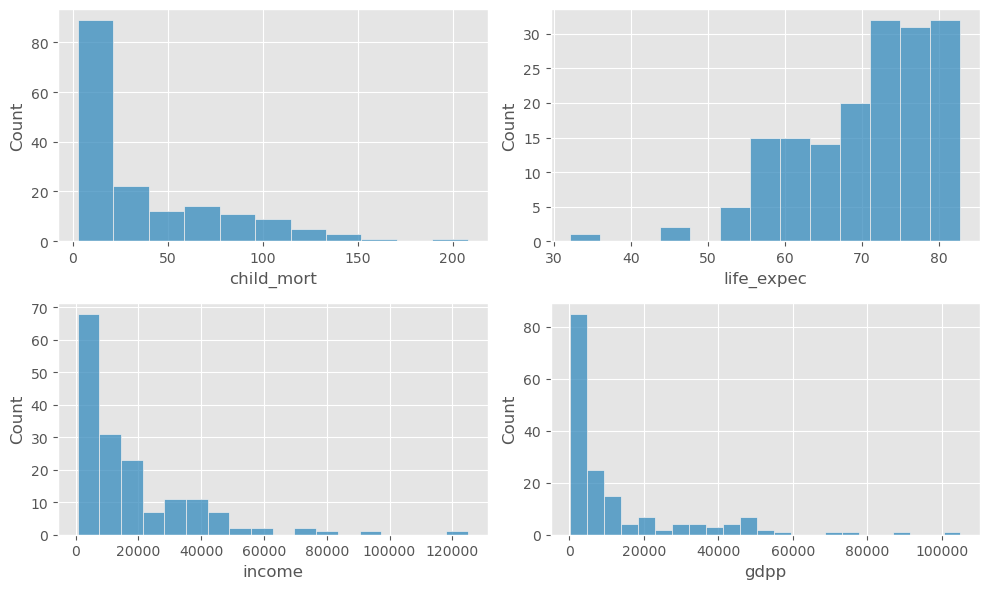

In [15]:
draw_hist()

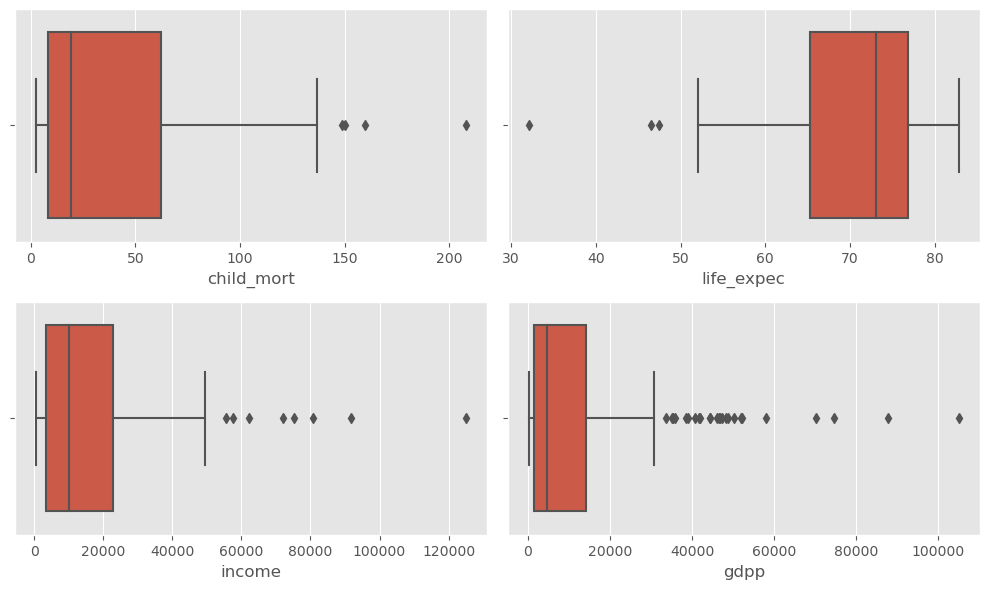

In [16]:
draw_box()

## Handling Outliers

*We shouldn't remove outliers becuase the nature of this data it is normal to have etreme or different data than usual*

In [17]:
X.shape

(167, 4)

## See correlation between features

### Heat Map

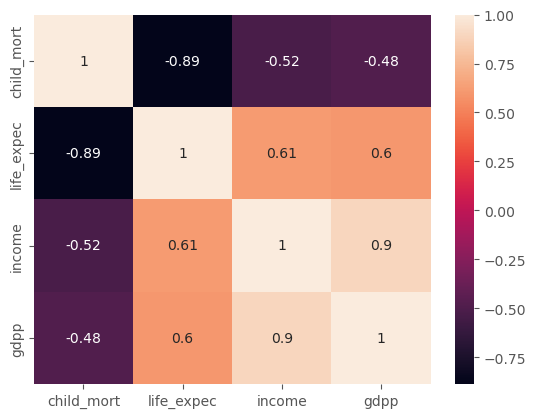

In [18]:
correlation = X.corr()
sns.heatmap(correlation, annot=True)
plt.show()

* ***There is a high correlation between features***
* ***There is a high positive correlation between income per person and GDP per capita***
* ***There is a high negative correlation between the birth life expectation (life_expec) and rate of children death (child_mort).***
* ***There is a negative correlation between rate of death of children under 5 and income per person. This means that in countries that income per person is higher, the children death rate is lower.***
* ***There is a negative correlation between rate of death of children under 5 and GDPP. This means that countries with higher GDPP have lower children death rate. And this indicates a better healthcare in countries with higher economical growth.***

### Pairplot

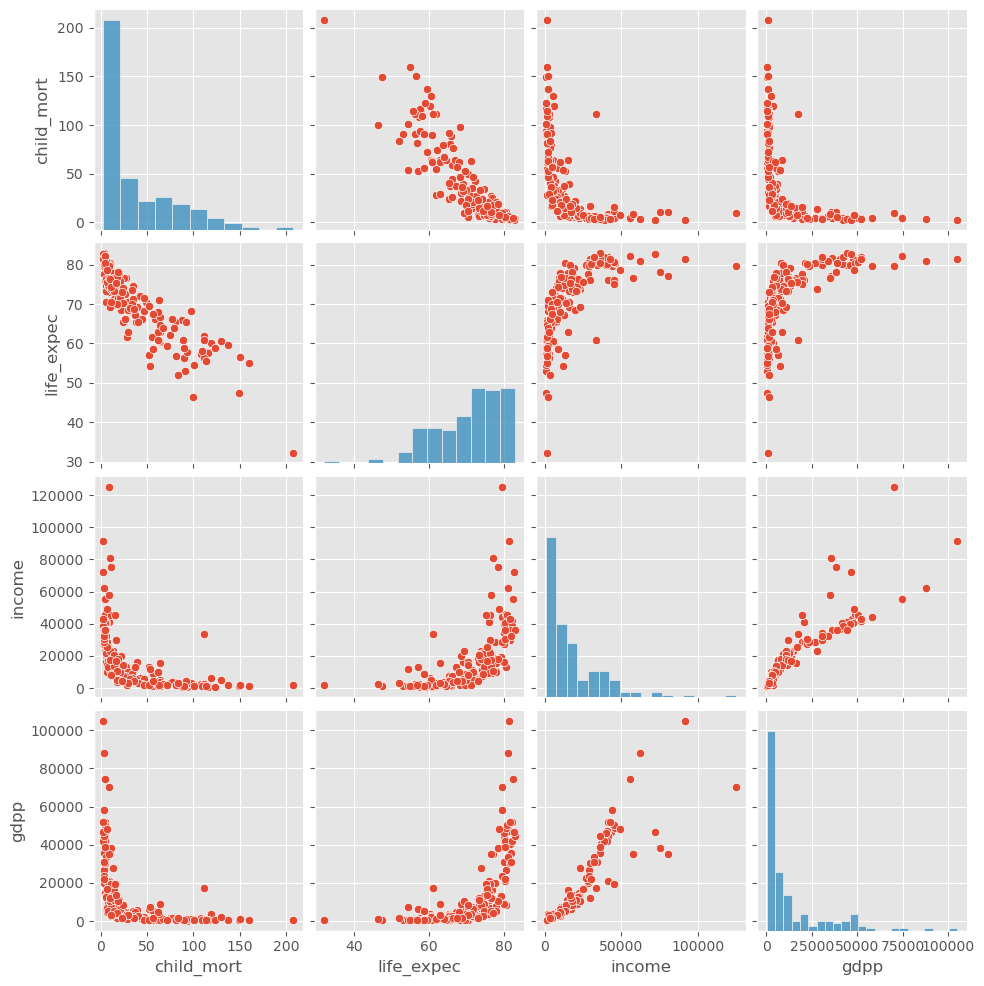

In [19]:
sns.pairplot(X)
plt.show()

### Observations:

1. The relation between income and gdpp has positive correlation.
2. The relation between life_expec and child_mort is approximately **linear** and have negative correlation.
3. The relation between other features are **not linear**.

In [20]:
X.head()

,child_mort,life_expec,income,gdpp
0,90.2,56.2,1610,553
1,16.6,76.3,9930,4090
2,27.3,76.5,12900,4460
3,119.0,60.1,5900,3530
4,10.3,76.8,19100,12200


## Choosing The Number Of Clusters - The Elbow Method

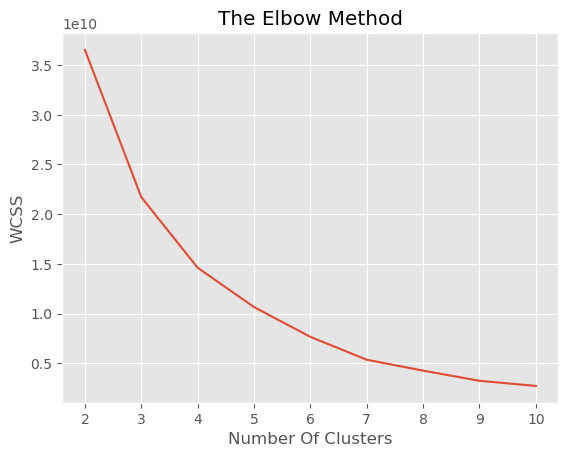

In [21]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(2,11), WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

## Make Clusters - The Model

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [23]:
XV = X.values

## Visualizing Clusters

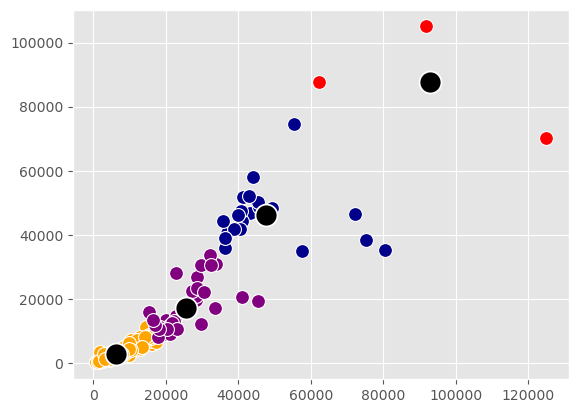

In [24]:
sns.scatterplot(XV[y_kmeans==0, 2], XV[y_kmeans==0, 3], s=100, color="darkblue")
sns.scatterplot(XV[y_kmeans==1, 2], XV[y_kmeans==1, 3], s=100, color="orange")
sns.scatterplot(XV[y_kmeans==2, 2], XV[y_kmeans==2, 3], s=100, color="purple")
sns.scatterplot(XV[y_kmeans==3, 2], XV[y_kmeans==3, 3], s=100, color="red")
sns.scatterplot(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], color="black", s=250)
plt.show()

1. Orange => The poor countries => C1
2. Purple => The normal/good countries => C2
3. Blue => The very good Countries (rich) => C0
4. Red => he rich countries (very rich - extreme) => C3

## Understand The Results

### First Cluster

In [25]:
X[y_kmeans==1].describe()

,child_mort,life_expec,income,gdpp
count,108.000000,108.000000,108.000000,108.000000
mean,54.135185,66.566667,6381.138889,3027.259259
std,41.160845,8.289392,4755.616179,2499.752000
min,5.500000,32.100000,609.000000,231.000000
25%,19.600000,60.650000,2065.000000,856.500000
50%,41.350000,68.050000,5295.000000,2695.000000
75%,80.475000,73.325000,9922.500000,4545.000000
max,208.000000,80.400000,17400.000000,11200.000000


* The average gdpp = 3027
* The minimum gdpp = 231, which is very low
* The maximum gdpp = 11200, which is normal but we can say **"not bad"** instead of **"good"**
* The income data is per year, which are very low
* The child_mort is very high, which means bad life quality

### See data of first cluster - Poor Countries

In [27]:
data_index = X[y_kmeans==1].index
Cluster1 = df.loc[data_index]
Cluster1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


### Second Cluster

In [28]:
X[y_kmeans==2].describe()

,child_mort,life_expec,income,gdpp
count,35.000000,35.000000,35.000000,35.000000
mean,12.102857,76.062857,25600.000000,17347.714286
std,17.918861,4.107746,7813.261728,7238.888071
min,3.200000,60.900000,15300.000000,8230.000000
25%,5.050000,74.500000,19750.000000,11950.000000
50%,7.900000,76.100000,22900.000000,14600.000000
75%,14.000000,79.300000,29600.000000,21600.000000
max,111.000000,81.900000,45400.000000,33700.000000


In [29]:
data_index = X[y_kmeans==2].index
Cluster2 = df.loc[data_index]
Cluster2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000


### Third Cluster

In [30]:
X[y_kmeans==0].describe()

,child_mort,life_expec,income,gdpp
count,21.000000,21.000000,21.000000,21.000000
mean,5.042857,80.457143,47571.428571,46085.714286
std,2.338284,1.720631,13249.797842,8897.038030
min,2.600000,76.500000,35800.000000,35000.000000
25%,4.000000,80.000000,39800.000000,40600.000000
50%,4.300000,80.500000,42900.000000,46200.000000
75%,5.200000,81.700000,49400.000000,48700.000000
max,10.800000,82.800000,80600.000000,74600.000000


In [31]:
data_index = X[y_kmeans==0].index
Cluster3 = df.loc[data_index]
Cluster3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400


### Fourth Cluster

In [32]:
X[y_kmeans==3].describe()

,child_mort,life_expec,income,gdpp
count,3.00000,3.000000,3.000000,3.000000
mean,5.00000,80.600000,93000.000000,87700.000000
std,3.46987,0.964365,31370.208798,17350.216137
min,2.80000,79.500000,62300.000000,70300.000000
25%,3.00000,80.250000,77000.000000,79050.000000
50%,3.20000,81.000000,91700.000000,87800.000000
75%,6.10000,81.150000,108350.000000,96400.000000
max,9.00000,81.300000,125000.000000,105000.000000


In [33]:
data_index = X[y_kmeans==3].index
Cluster4 = df.loc[data_index]
Cluster4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


## Visualization for the most two clusters deserving aid

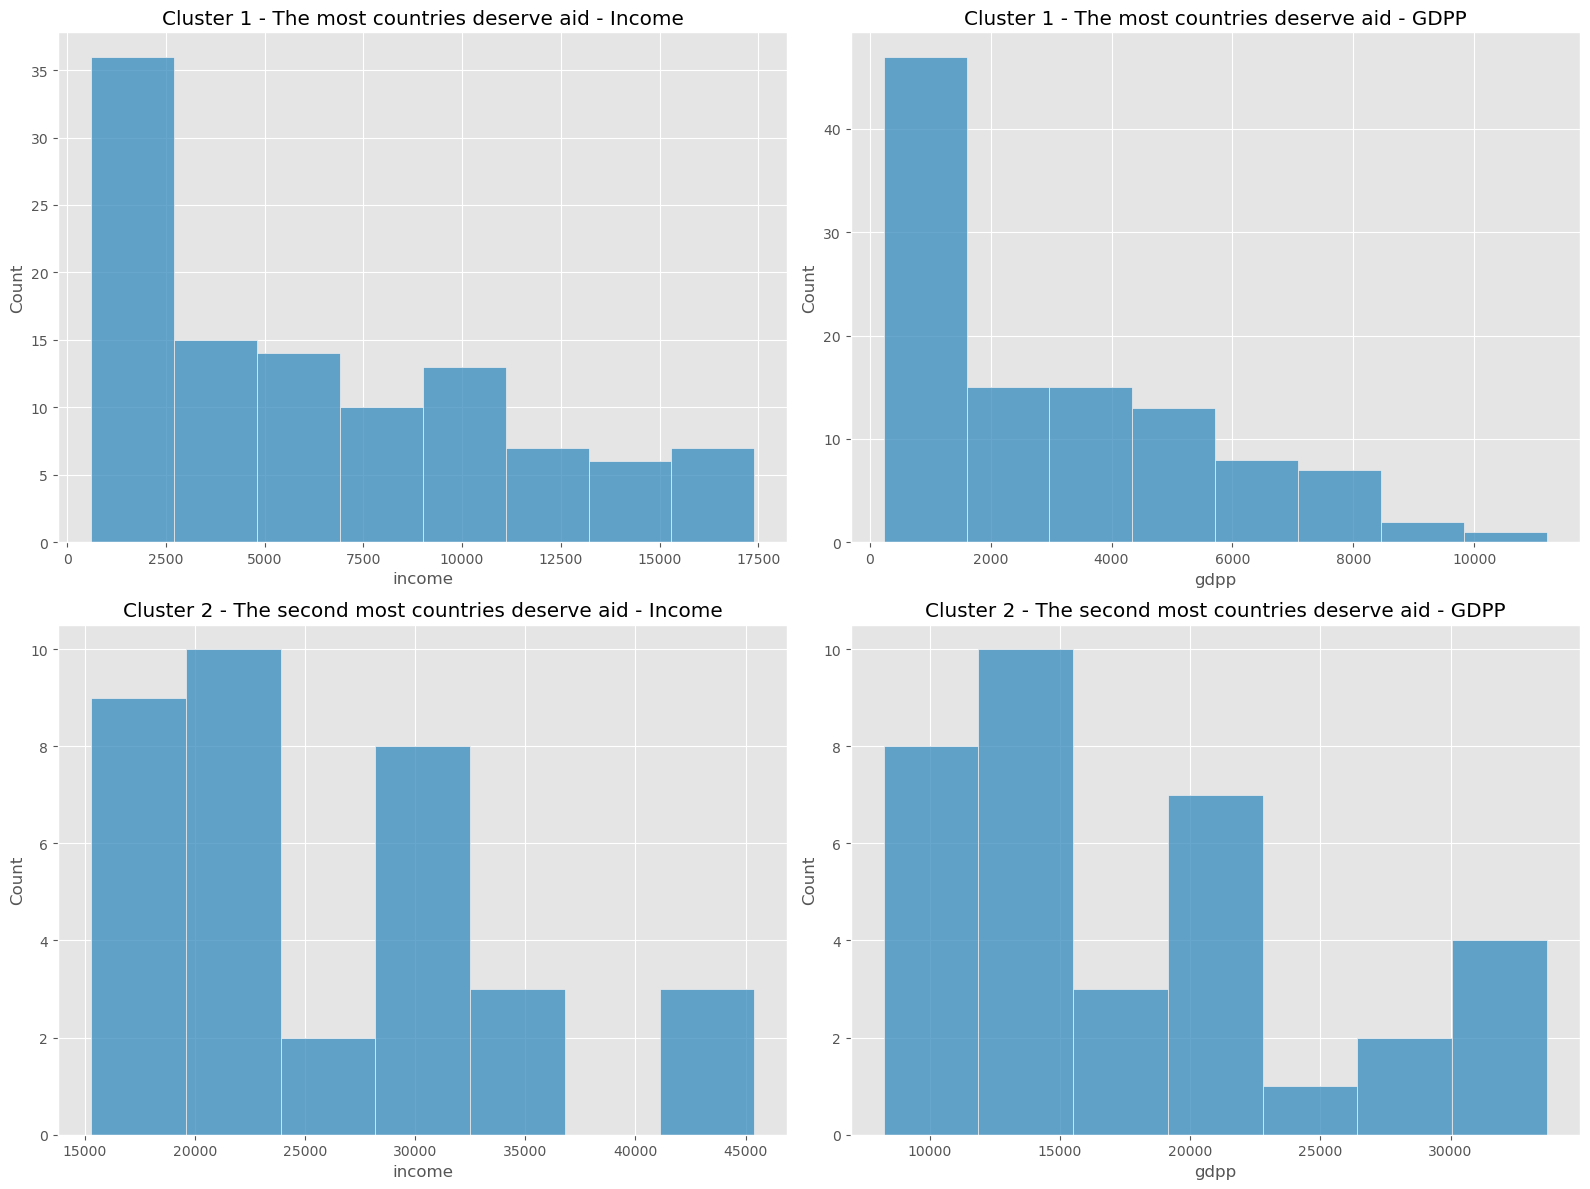

In [34]:
fig = plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.title("Cluster 1 - The most countries deserve aid - Income")
sns.histplot(Cluster1["income"])
plt.subplot(2,2,2)
plt.title("Cluster 1 - The most countries deserve aid - GDPP")
sns.histplot(Cluster1["gdpp"])
plt.subplot(2,2,3)
plt.title("Cluster 2 - The second most countries deserve aid - Income")
sns.histplot(Cluster2["income"])
plt.subplot(2,2,4)
plt.title("Cluster 2 - The second most countries deserve aid - GDPP")
sns.histplot(Cluster2["gdpp"])
plt.tight_layout()
plt.show()

## Inferences

1. Cluster 1 includes the countries that deserve the aid, the most.
2. Cluster 1, the cluster having the most poor countries, include 108 different countries.
3. Cluster 1 has very poor countries (The poorest among the poorest) that has the annual income between 1000 and 2000, and has other poor countries that the annual income is > 6000, so we want to make the priority for countries having 1000-2000

### Sort countries according to income

In [36]:
Cluster1_Sorted = Cluster1.sort_values('income')

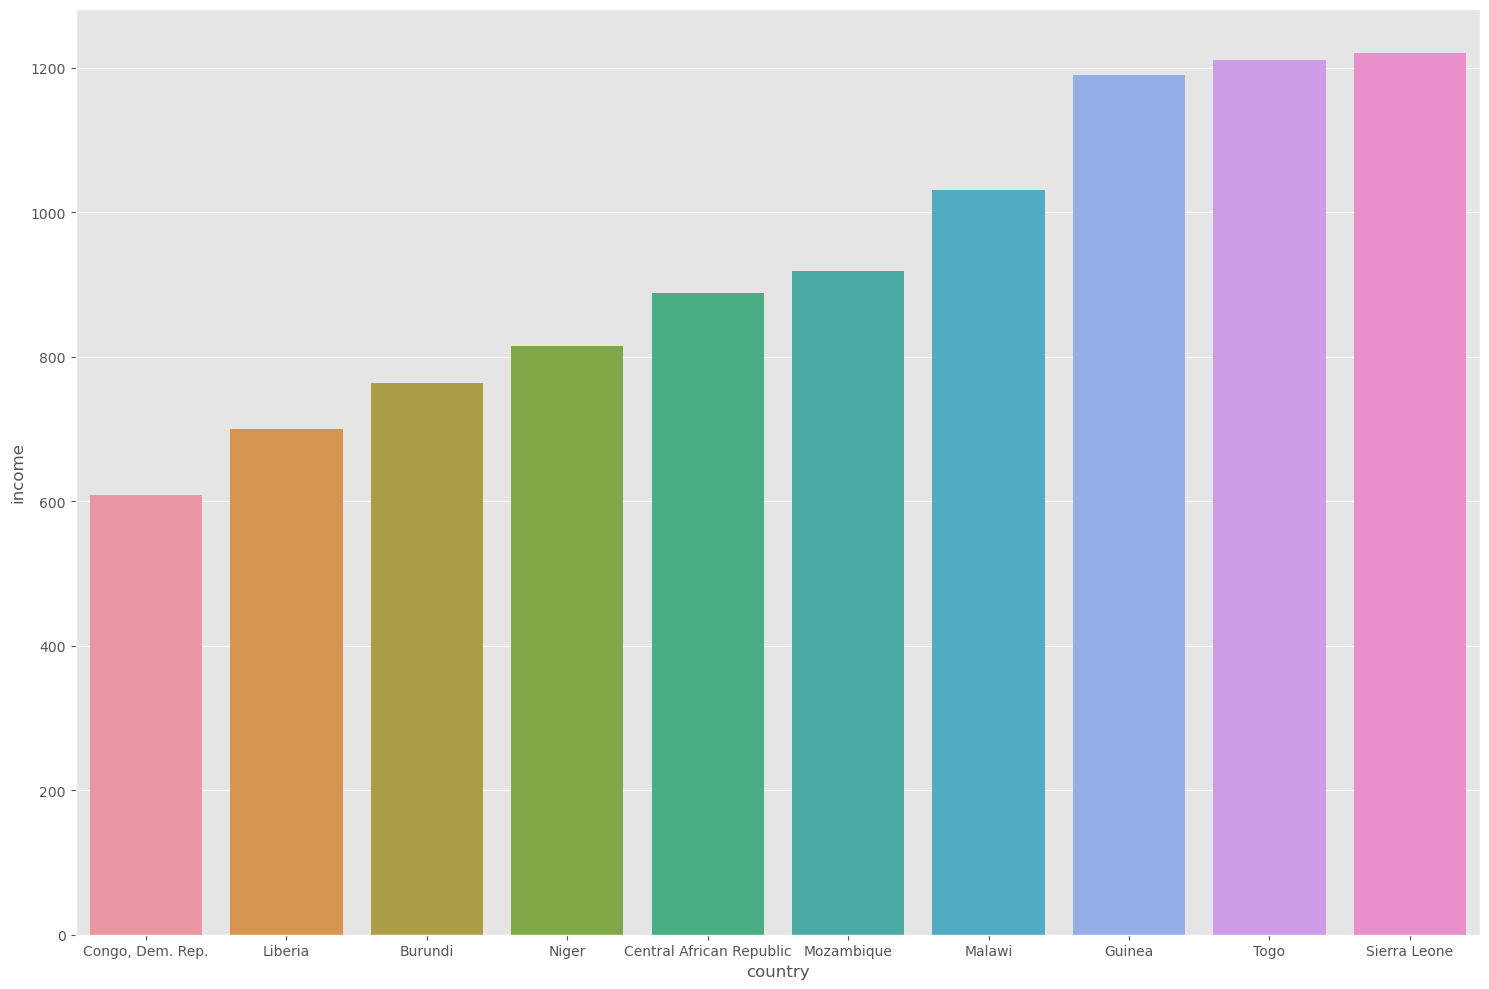

In [44]:
fig = plt.figure(figsize=(15,10))
sns.barplot(Cluster1_Sorted["country"].head(10), Cluster1_Sorted["income"].head(10))
plt.tight_layout()

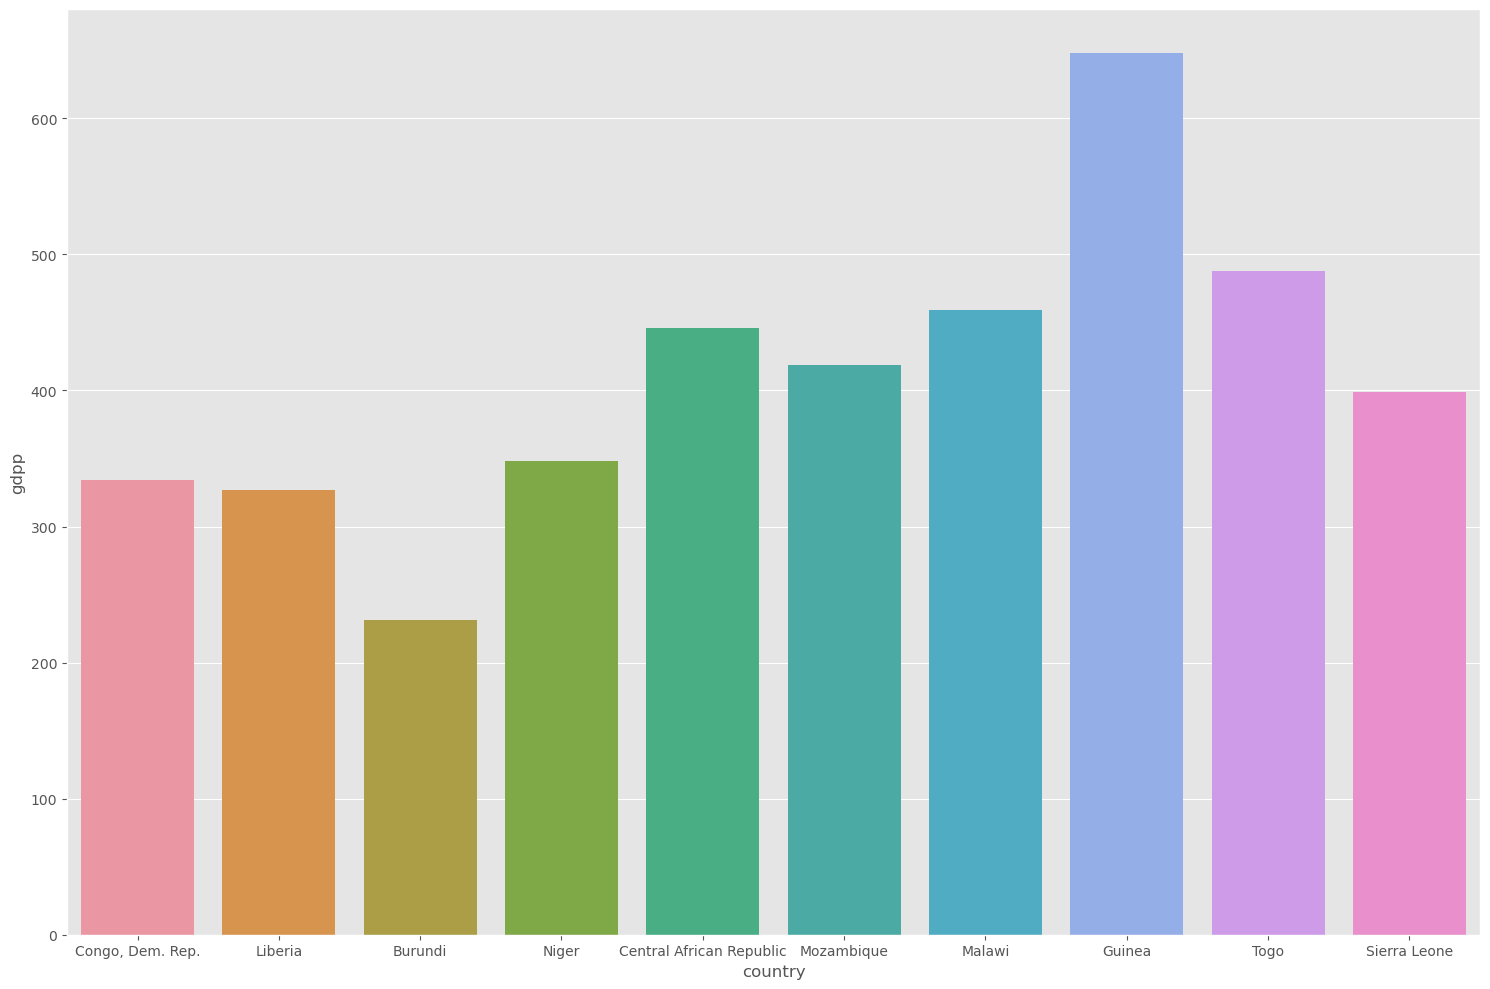

In [45]:
fig = plt.figure(figsize=(15,10))
sns.barplot(Cluster1_Sorted["country"].head(10), Cluster1_Sorted["gdpp"].head(10))
plt.tight_layout()

# Final Results

***Top 10 countries deserve the financial aid :***

In [50]:
Cluster1_Sorted.reset_index(drop=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,children_per_woman,gdpp
0,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
2,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
4,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
5,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
6,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
7,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
8,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
9,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


**We can notice that these 10 countries are really suffering from high death rates in children, bad health conditions, low annual income and life expectations during birth in range [47%-60%] only !! Also, the number of children per woman is relatively high wich indicates bad life quality, and less opportunities in education for women in these countries. Also, we can notice very very low gdpp (rarely exceeds 500) which indicates bad economical conditions.**